In [5]:
#Import necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("tab10")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
plt.style.use('ggplot')
params = {'legend.fontsize': 15,
          'legend.title_fontsize': 16,
          'figure.figsize': (15, 5),
         'axes.labelsize': 18,
         'axes.titlesize':20,
         'xtick.labelsize':18,
         'ytick.labelsize':18}
plt.rcParams.update(params)

# Loading the data:

In [19]:
import zipfile
r_path='/Users/apple/Desktop/amsterdam_tech/m5w5/'
zip_file = zipfile.ZipFile(r_path+'data.zip', 'r')
zip_file.namelist()

['Features data set.csv', 'sales data-set.csv', 'stores data-set.csv']

In [23]:
# Loading the data into pandas dataframe for EDA

df_stores = pd.read_csv(r_path+'stores data-set.csv')
df_features = pd.read_csv(r_path+'Features data set.csv')
df_sales = pd.read_csv(r_path+'sales data-set.csv')

In [24]:
df_stores

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [68]:
df_features['Date'] = pd.to_datetime(df_features['Date'])
df_sales['Date'] = pd.to_datetime(df_sales['Date'])

Anonymized information about the 45 stores, indicating the type and size of store

In [69]:
df_sales.head()
df_sales.info()
df_sales.describe().T

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-05-02,24924.50,False
1,1,1,2010-12-02,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-05-03,21827.90,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


,count,mean,min,25%,50%,75%,max,std
Store,421570.0,22.200546,1.0,11.0,22.0,33.0,45.0,12.785297
Dept,421570.0,44.260317,1.0,18.0,37.0,74.0,99.0,30.492054
Date,421570,2011-06-19 05:35:51.733757184,2010-01-10 00:00:00,2010-10-12 00:00:00,2011-06-17 00:00:00,2012-03-02 00:00:00,2012-12-10 00:00:00,NaN
Weekly_Sales,421570.0,15981.258123,-4988.94,2079.65,7612.03,20205.8525,693099.36,22711.183519



Historical sales data, which covers to 2010-02-05 to 2012-11-01. Within this tab you will find the following fields:

Store - the store number

Dept - the department number

Date - the week

Weekly_Sales -  sales for the given department in the given store

IsHoliday - whether the week is a special holiday week

In [28]:
df_stores.head()
df_stores.info()
df_stores.describe().T

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


,count,mean,std,min,25%,50%,75%,max
Store,45.0,23.0,13.133926,1.0,12.0,23.0,34.0,45.0
Size,45.0,130287.6,63825.271991,34875.0,70713.0,126512.0,202307.0,219622.0


# Merging the data into a single Dataframe:

In [70]:
df_features = df_features.merge(df_stores, on = 'Store')
df = df_features.merge(df_sales, on = ['Store','Date','IsHoliday'])
df=df.fillna(0)


Contains additional data related to the store, department, and regional activity for the given dates.
Store - the store number

Date - the week

Temperature - average temperature in the region

Fuel_Price - cost of fuel in the region

MarkDown1-5 - anonymized data related to promotional markdowns. MarkDown data is only available after Nov 2011, and is not available for all stores 

all the time. Any missing value is marked with an NA

CPI - the consumer price index

Unemployment - the unemployment rate

IsHoliday - whether the week is a special holiday week


In [71]:
df.head()
df.info()
df.describe().T
df = df.sort_values(by = ['Date'])

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type_x,Size_x,Type_y,Size_y,Dept,Weekly_Sales
0,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,A,151315,1,24924.50
1,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,A,151315,2,50605.27
2,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,A,151315,3,13740.12
3,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,A,151315,4,39954.04
4,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,A,151315,5,32229.38


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Date          421570 non-null  datetime64[ns]
 2   Temperature   421570 non-null  float64       
 3   Fuel_Price    421570 non-null  float64       
 4   MarkDown1     421570 non-null  float64       
 5   MarkDown2     421570 non-null  float64       
 6   MarkDown3     421570 non-null  float64       
 7   MarkDown4     421570 non-null  float64       
 8   MarkDown5     421570 non-null  float64       
 9   CPI           421570 non-null  float64       
 10  Unemployment  421570 non-null  float64       
 11  IsHoliday     421570 non-null  bool          
 12  Type_x        421570 non-null  object        
 13  Size_x        421570 non-null  int64         
 14  Type_y        421570 non-null  object        
 15  Size_y        421

,count,mean,min,25%,50%,75%,max,std
Store,421570.0,22.200546,1.0,11.0,22.0,33.0,45.0,12.785297
Date,421570,2011-06-19 05:35:51.733757440,2010-01-10 00:00:00,2010-10-12 00:00:00,2011-06-17 00:00:00,2012-03-02 00:00:00,2012-12-10 00:00:00,NaN
Temperature,421570.0,60.090059,-2.06,46.68,62.09,74.28,100.14,18.447931
Fuel_Price,421570.0,3.361027,2.472,2.933,3.452,3.738,4.468,0.458515
MarkDown1,421570.0,2590.074819,0.0,0.0,0.0,2809.05,88646.76,6052.385934
MarkDown2,421570.0,879.974298,-265.76,0.0,0.0,2.2,104519.54,5084.538801
MarkDown3,421570.0,468.087665,-29.1,0.0,0.0,4.54,141630.61,5528.873453
MarkDown4,421570.0,1083.132268,0.0,0.0,0.0,425.29,67474.85,3894.529945
MarkDown5,421570.0,1662.772385,0.0,0.0,0.0,2168.04,108519.28,4207.629321
CPI,421570.0,171.201947,126.064,132.022667,182.31878,212.416993,227.232807,39.159276


In [72]:
# splitting date into 3 columns denoting Year, Month and Day respectively
df['Year'] = df.Date.apply(lambda x: int(str(x)[:4]))
df['Month'] = df.Date.apply(lambda x: int(str(x)[5:7]))
df['Year-Month'] = df.Date.apply(lambda x: str(x)[:7])
df['Day'] = df.Date.apply(lambda x: int(str(x)[8:10]))

# Exploratory Data analysis:

Year  Month
2010  1        2.733064
      2        2.744178
      3        2.818446
      4        2.867639
      5        2.838073
      6        2.776504
      7        2.805773
      8        2.777474
      9        2.776715
      10       2.848813
      11       2.873567
      12       2.904269
2011  1        3.331284
      2        3.362113
      3        3.664380
      4        3.601382
      5        3.911171
      6        3.828259
      7        3.552999
      8        3.659264
      9        3.589717
      10       3.594793
      11       3.423704
      12       3.405470
2012  1        3.480868
      2        3.625659
      3        3.728214
      4        3.960989
      5        3.823684
      6        3.581615
      7        3.602397
      8        3.735556
      9        3.843524
      10       3.700267
      11       3.870212
      12       3.897425
Name: Fuel_Price, dtype: float64

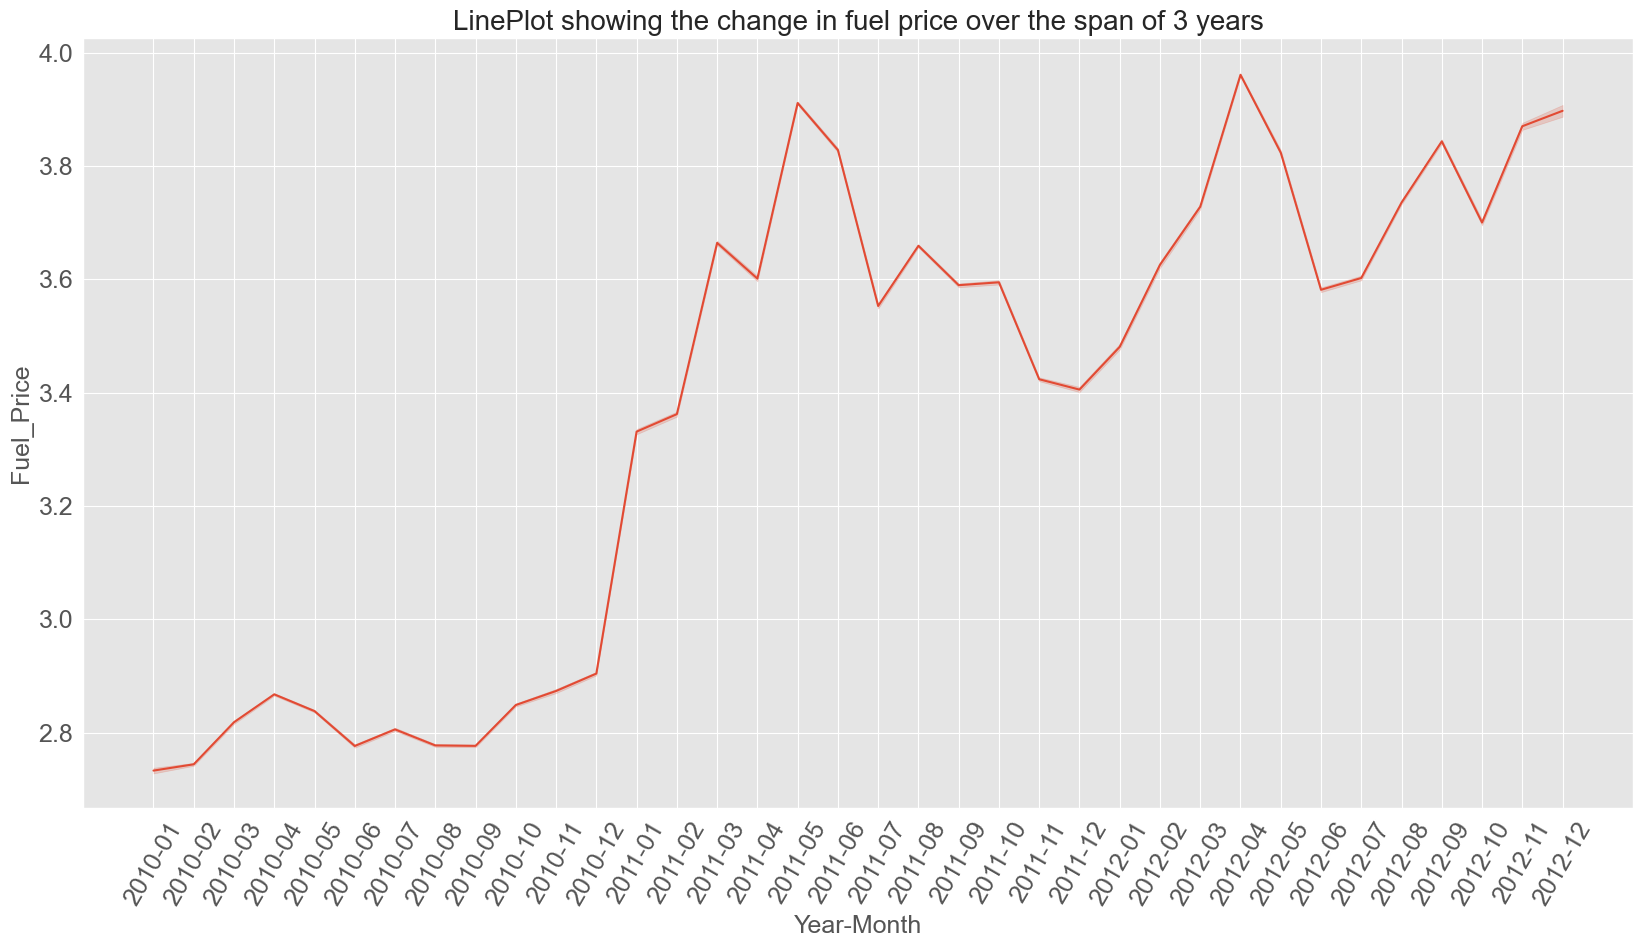

In [76]:
df.groupby(['Year','Month']).Fuel_Price.mean()
plot_no = 1
_ = plt.subplots(figsize = (20,10))
_ = plt.xticks(rotation = 60)
_ = sns.lineplot(data = df, x = 'Year-Month',y = 'Fuel_Price')
_ = plt.title('LinePlot showing the change in fuel price over the span of 3 years', fontsize=20)
plt.savefig(str(plot_no)+'_plot.png')
plot_no +=1

In [77]:
r = 5 #lets round off the temperature in the range of r
df['Temperature_r'] = df.sort_values(by=['Temperature']).Temperature.apply(lambda x : x - x %r)

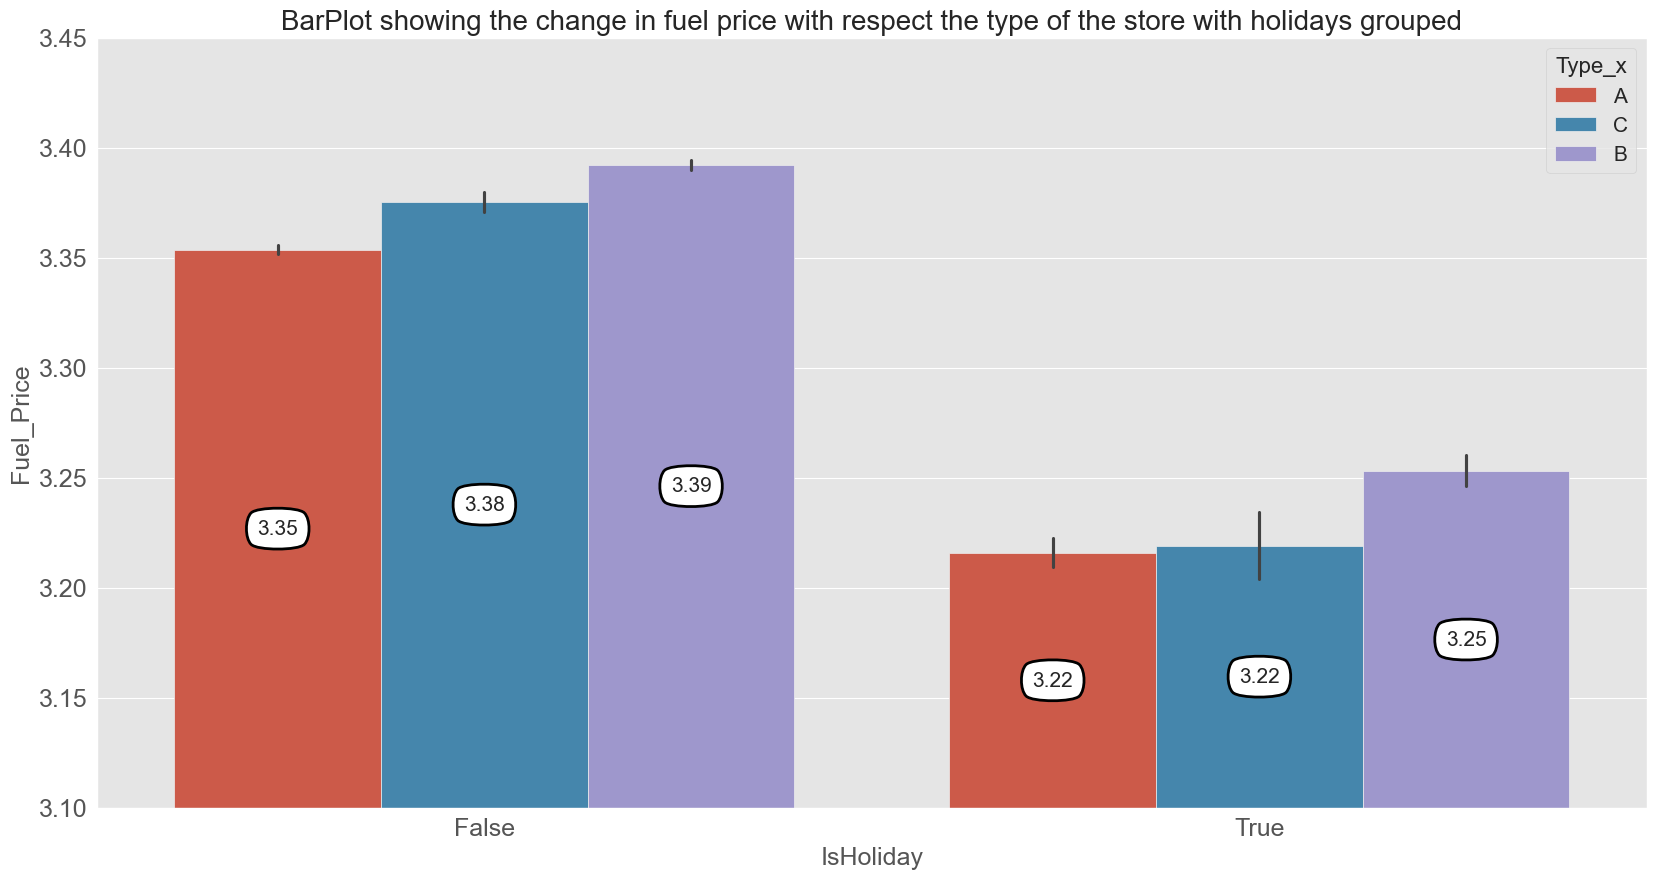

In [84]:
_ = plt.subplots(figsize = (20,10))
_ = plt.ylim(3.1,3.45)
plots = sns.barplot(data = df, x = 'IsHoliday', y = 'Fuel_Price', hue = 'Type_x')
_ = plt.title('BarPlot showing the change in fuel price with respect the type of the store with holidays grouped')
for bar in plots.patches:
    _ = plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height() - (bar.get_height()-3.1)/2), ha='center', va='center',
                   size=15, xytext=(0, 0),bbox=dict(boxstyle="round4,pad=0.6", fc="w", ec="black", lw=2),
                   textcoords='offset points')
plt.savefig(str(plot_no)+'_plot.png')
plot_no +=1

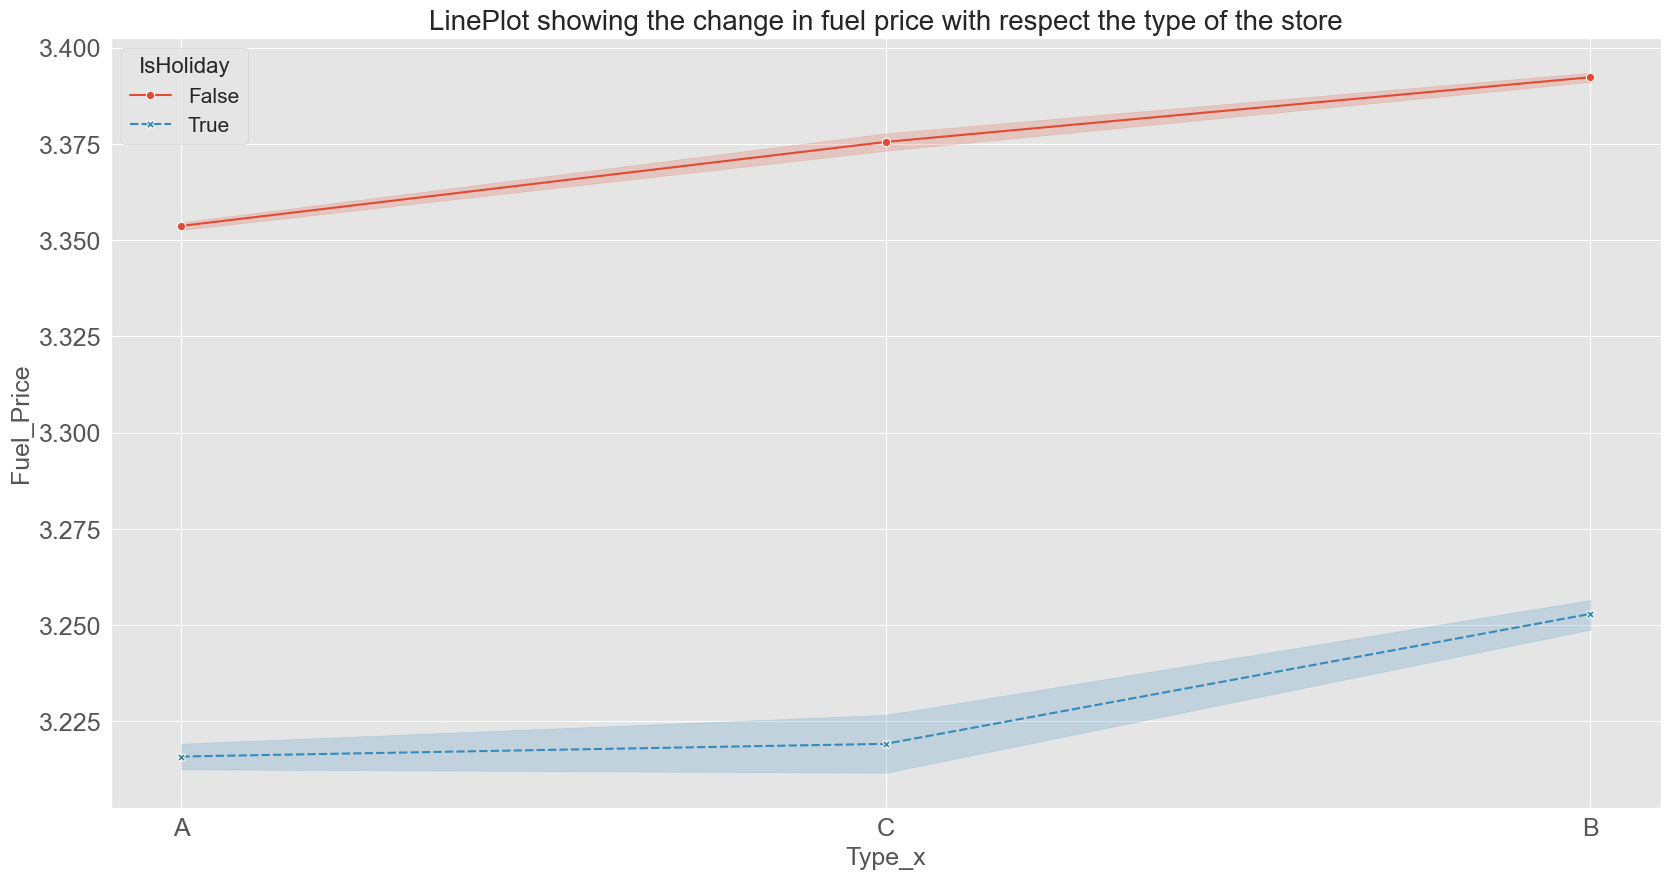

In [86]:
_ = plt.subplots(figsize = (20,10))
_ = sns.lineplot(data = df, x = 'Type_x', y = 'Fuel_Price', hue = 'IsHoliday',style = 'IsHoliday', markers = True, errorbar=('ci', 68))
_ = plt.title('LinePlot showing the change in fuel price with respect the type of the store')
plt.savefig(str(plot_no)+'_plot.png')
plot_no +=1

There is a significant increase in the fuel price for the type B store and comparatively the fuels prices were very less during weekends. 

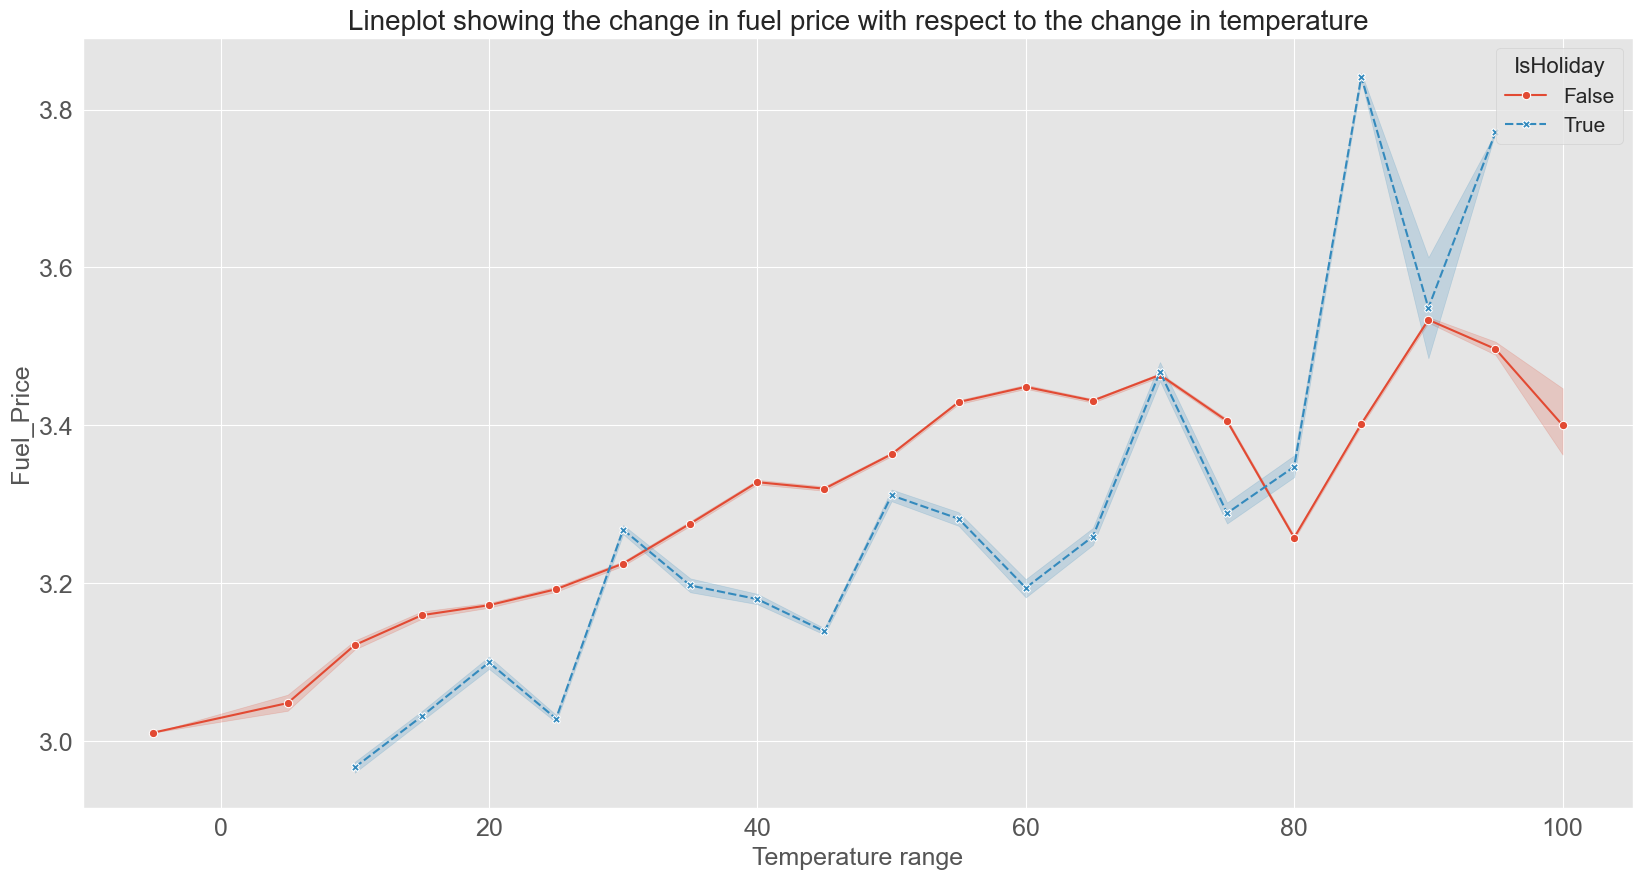

In [38]:
_ = plt.subplots(figsize = (20,10))
_ = sns.lineplot(data = df, x = 'Temperature_r', y = 'Fuel_Price', hue = 'IsHoliday',style = 'IsHoliday', markers = True, errorbar=('ci', 68))
_ = plt.xlabel('Temperature range')
_ = plt.title('Lineplot showing the change in fuel price with respect to the change in temperature')
plt.savefig(str(plot_no)+'_plot.png')
plot_no +=1

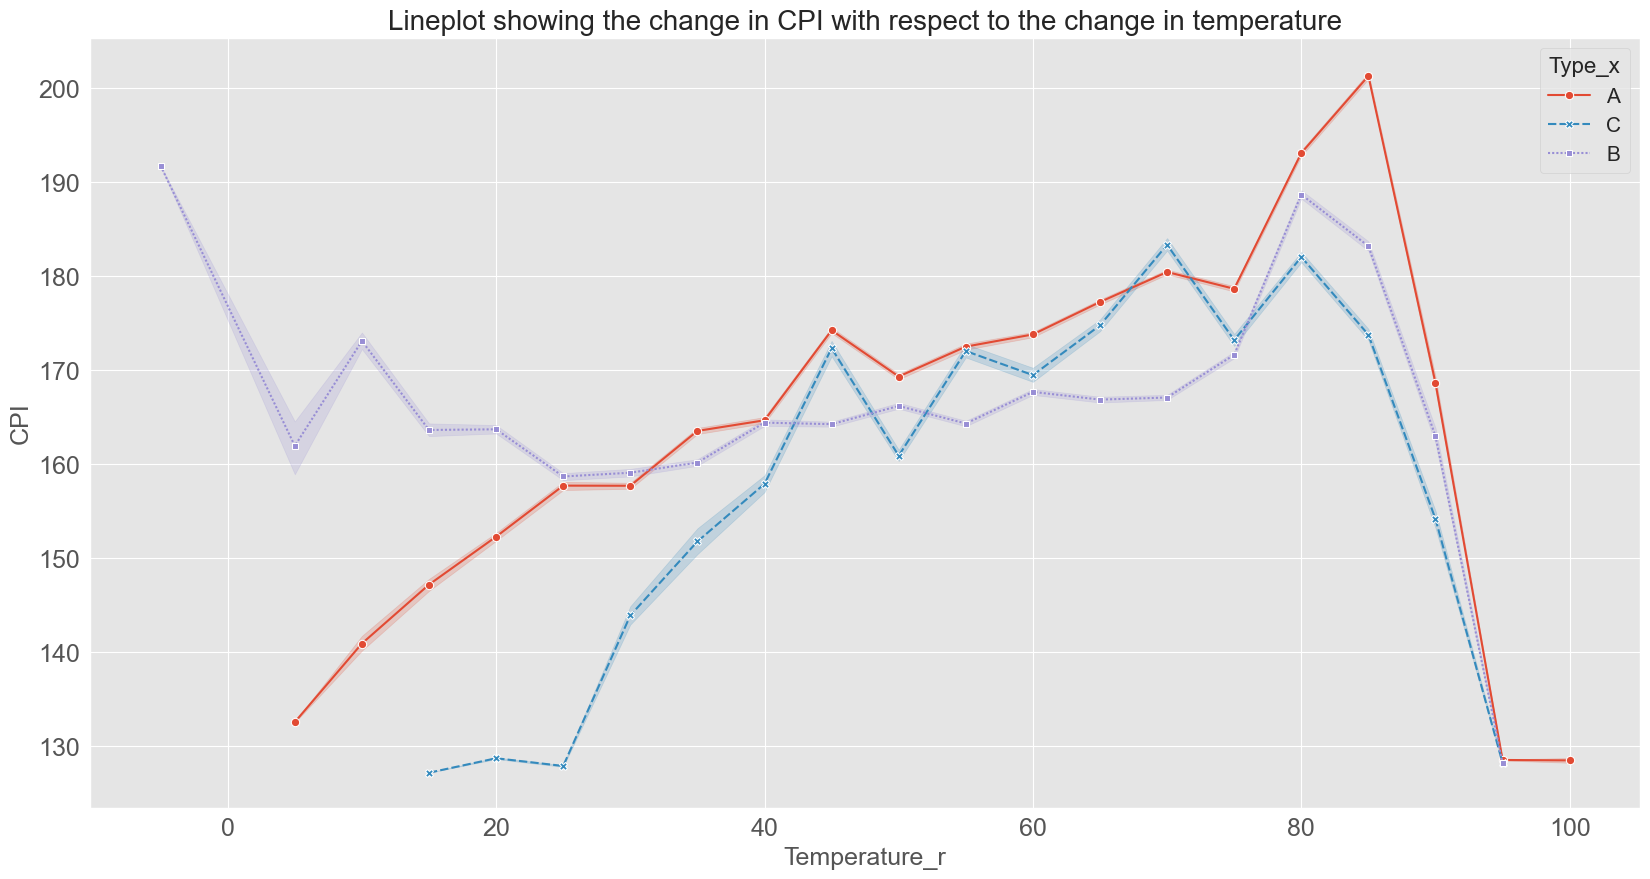

In [88]:
_ = plt.subplots(figsize = (20,10))
_ = sns.lineplot(data = df, x = 'Temperature_r', y = 'CPI', hue = 'Type_x',style = 'Type_x', markers = True, errorbar=('ci', 68))
_ = plt.title('Lineplot showing the change in CPI with respect to the change in temperature')
plt.savefig(str(plot_no)+'_plot.png')
plot_no +=1

It is seen that the fuel price increases with increase in temperature steadily during workdays and unevenly during holidays

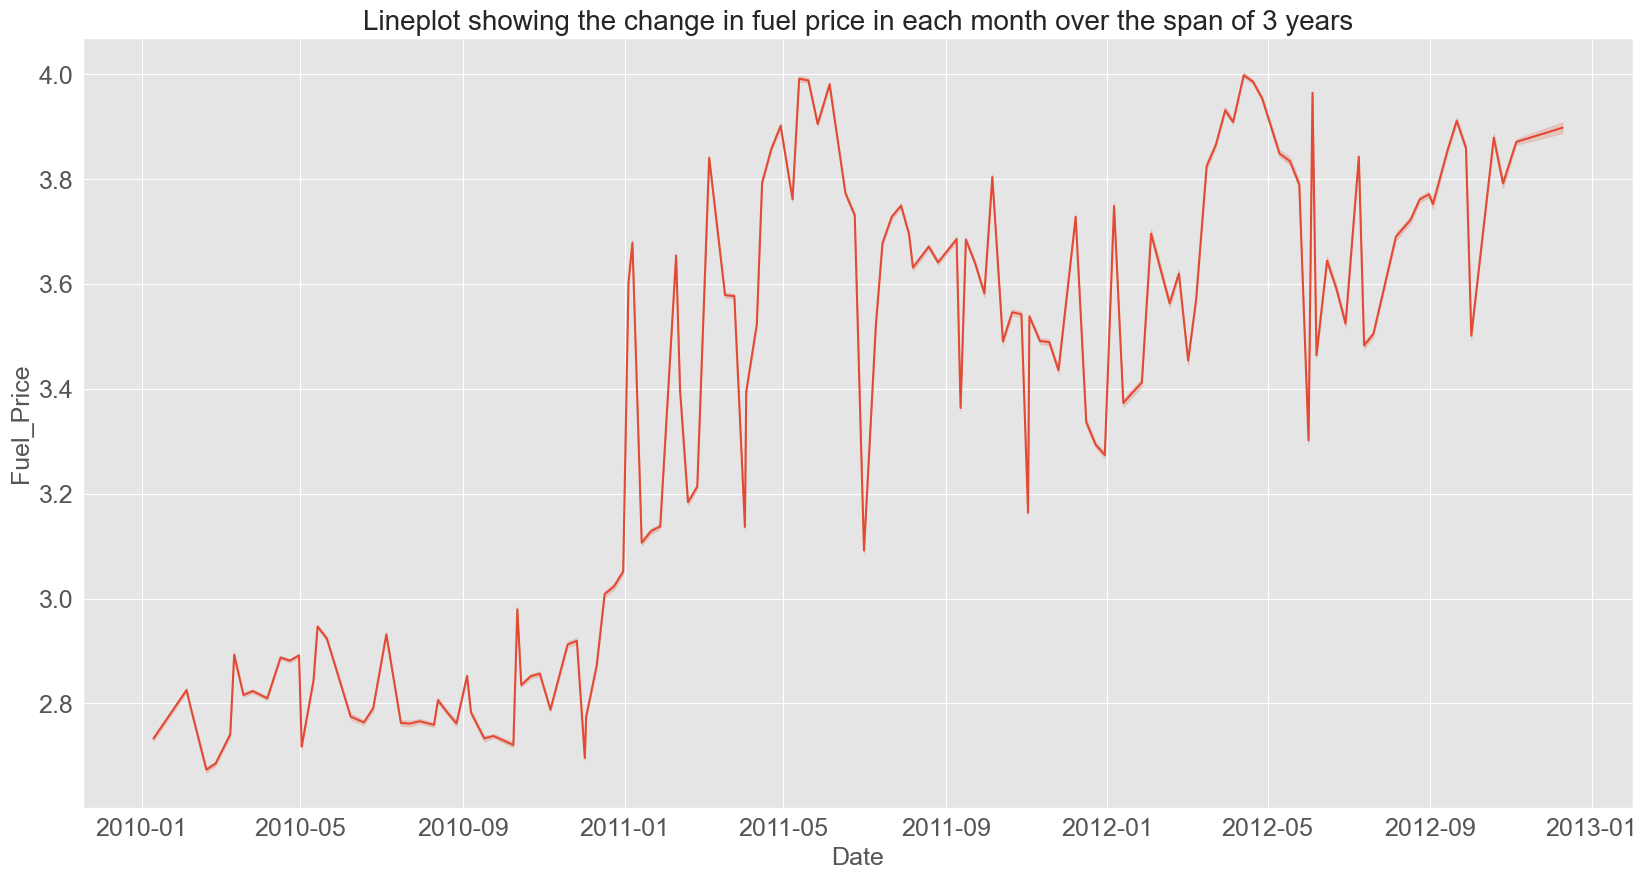

In [89]:
_ = plt.subplots(figsize = (20,10))
_ = sns.lineplot(data = df, x = 'Date', y = 'Fuel_Price')
_ = plt.title('Lineplot showing the change in fuel price in each month over the span of 3 years')
plt.savefig(str(plot_no)+'_plot.png')
plot_no +=1

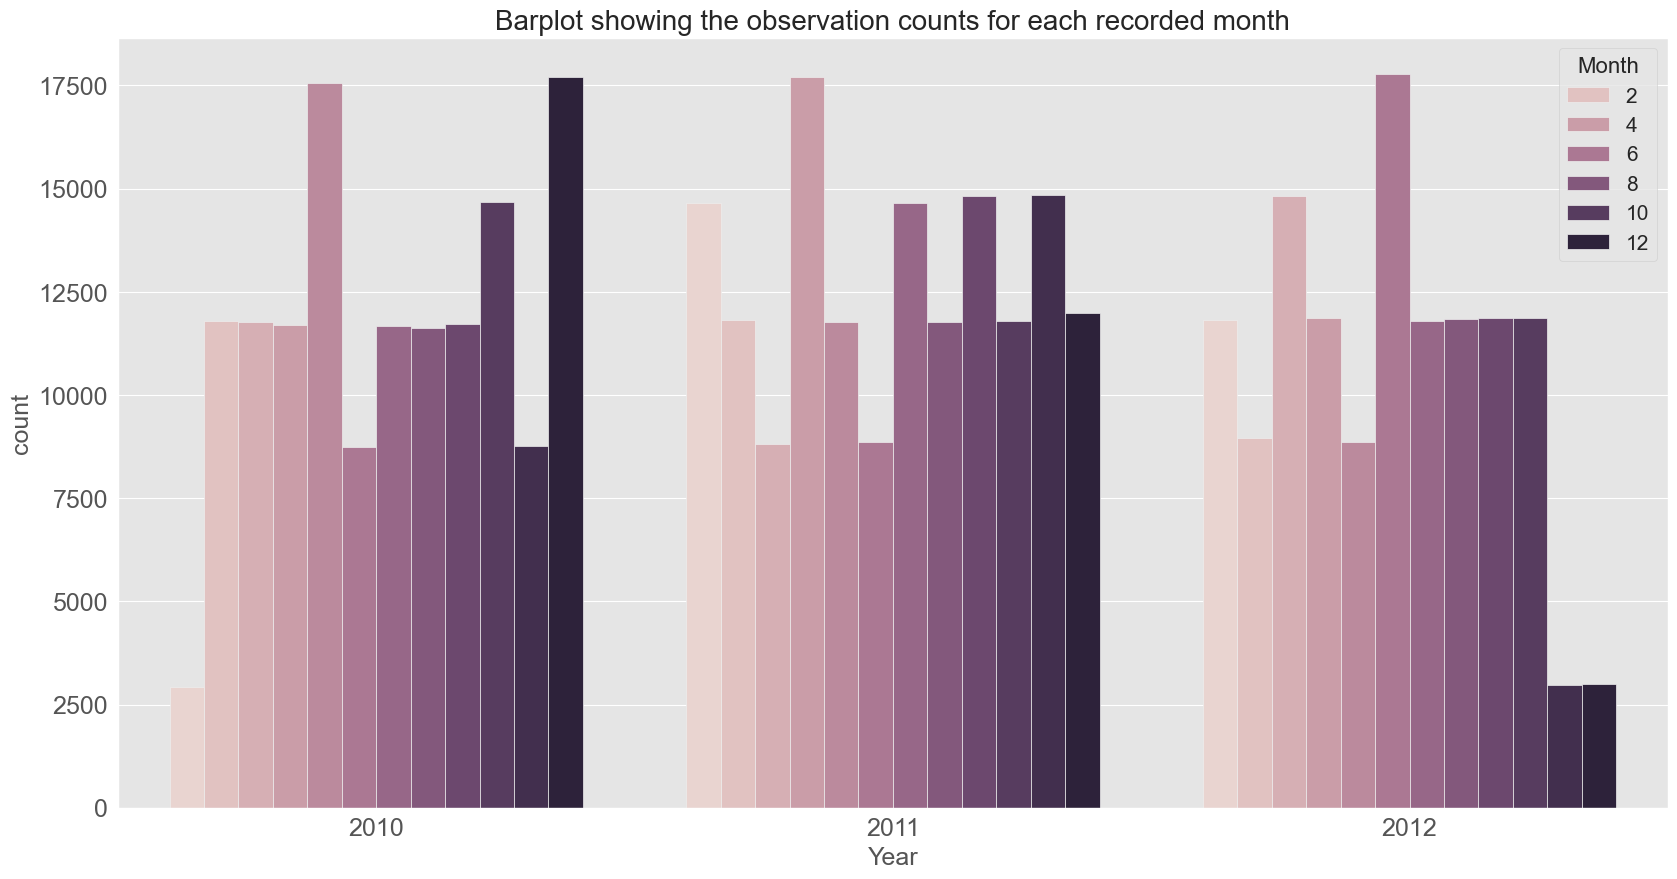

In [90]:
_ = plt.subplots(figsize = (20,10))
_ = sns.countplot(data = df,x='Year',hue='Month')
_ = plt.title('Barplot showing the observation counts for each recorded month')
plt.savefig(str(plot_no)+'_plot.png')
plot_no +=1

There is no significant pattern in the data points spread each months in the dataset. However one noticeable cue is that no sales data is recorded / happened during the month of September in 2013

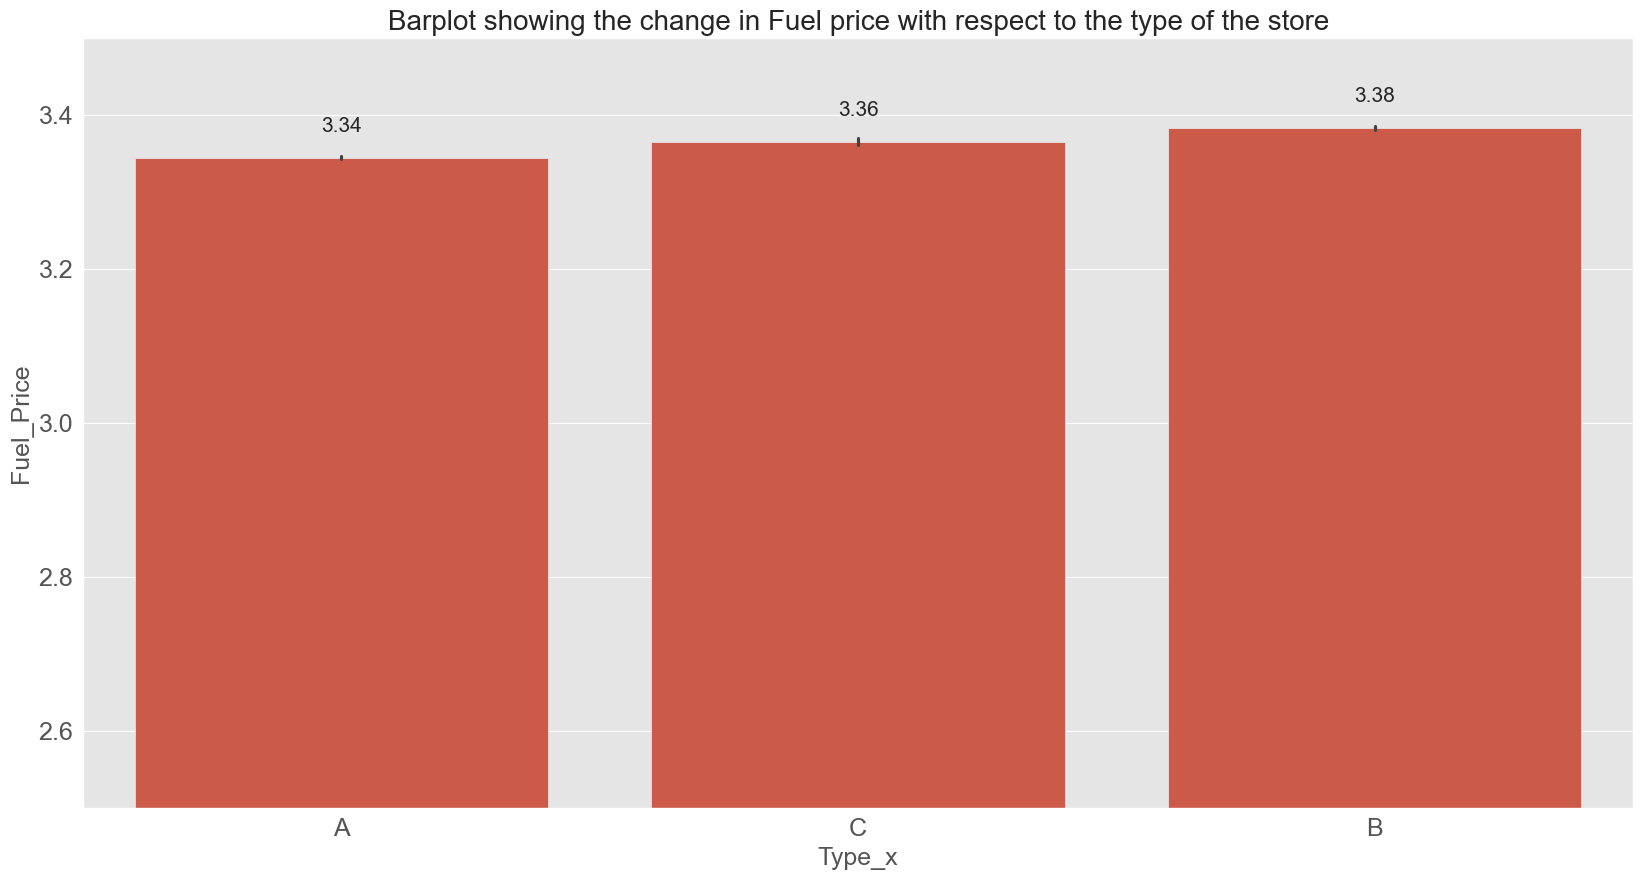

In [92]:
_ = plt.subplots(figsize = (20,10))
plots = sns.barplot(data = df, x = 'Type_x', y = 'Fuel_Price')
for bar in plots.patches:
    _ = plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 23),
                   textcoords='offset points');
_ = plt.ylim(2.5,3.5)
_ = plt.title('Barplot showing the change in Fuel price with respect to the type of the store')
plt.savefig(str(plot_no)+'_plot.png')
plot_no +=1

In [94]:
df.dtypes

Store                     int64
Date             datetime64[ns]
Temperature             float64
Fuel_Price              float64
MarkDown1               float64
MarkDown2               float64
MarkDown3               float64
MarkDown4               float64
MarkDown5               float64
CPI                     float64
Unemployment            float64
IsHoliday                  bool
Type_x                   object
Size_x                    int64
Type_y                   object
Size_y                    int64
Dept                      int64
Weekly_Sales            float64
Year                      int64
Month                     int64
Year-Month               object
Day                       int64
Temperature_r           float64
dtype: object

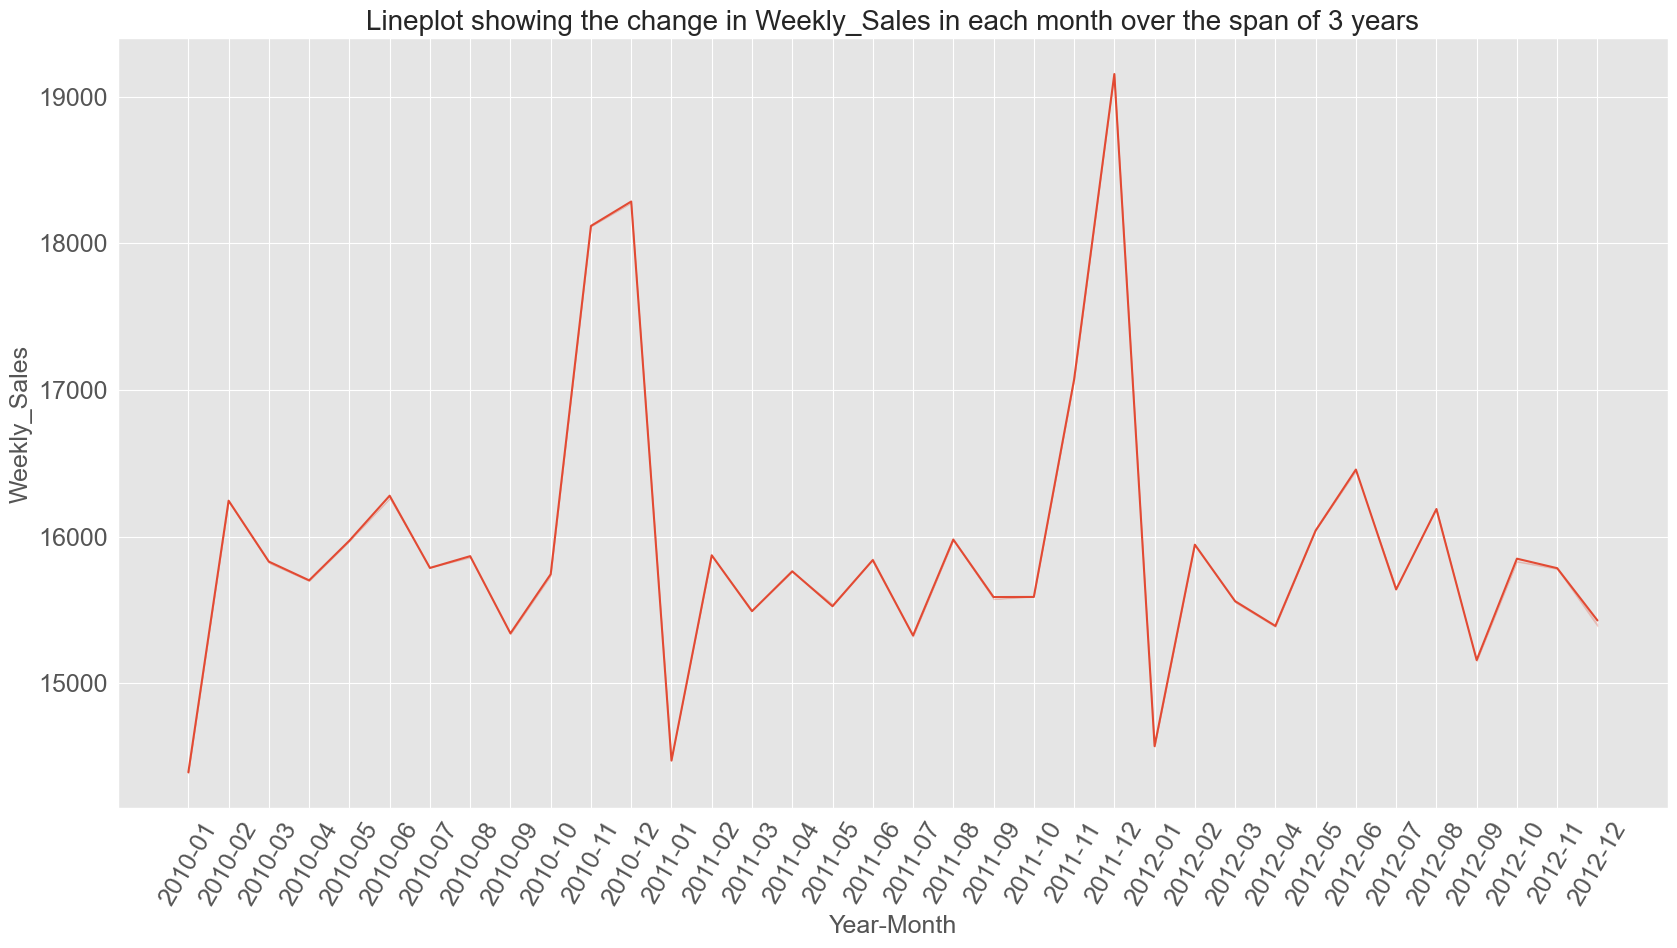

In [95]:

fig,ax = plt.subplots(figsize = (20,10))
_ = sns.lineplot(data = df, x = 'Year-Month', y = 'Weekly_Sales', ax = ax, errorbar=('ci',1))
_ = plt.xticks(rotation = 60)
_ = plt.title('Lineplot showing the change in Weekly_Sales in each month over the span of 3 years')
plt.savefig(str(plot_no)+'_plot.png')
plot_no +=1

There was a peak during the end of the years 2010 and 2011 but not during 2012. This might be due to comparatively very less observations during the last 2 months in 2012

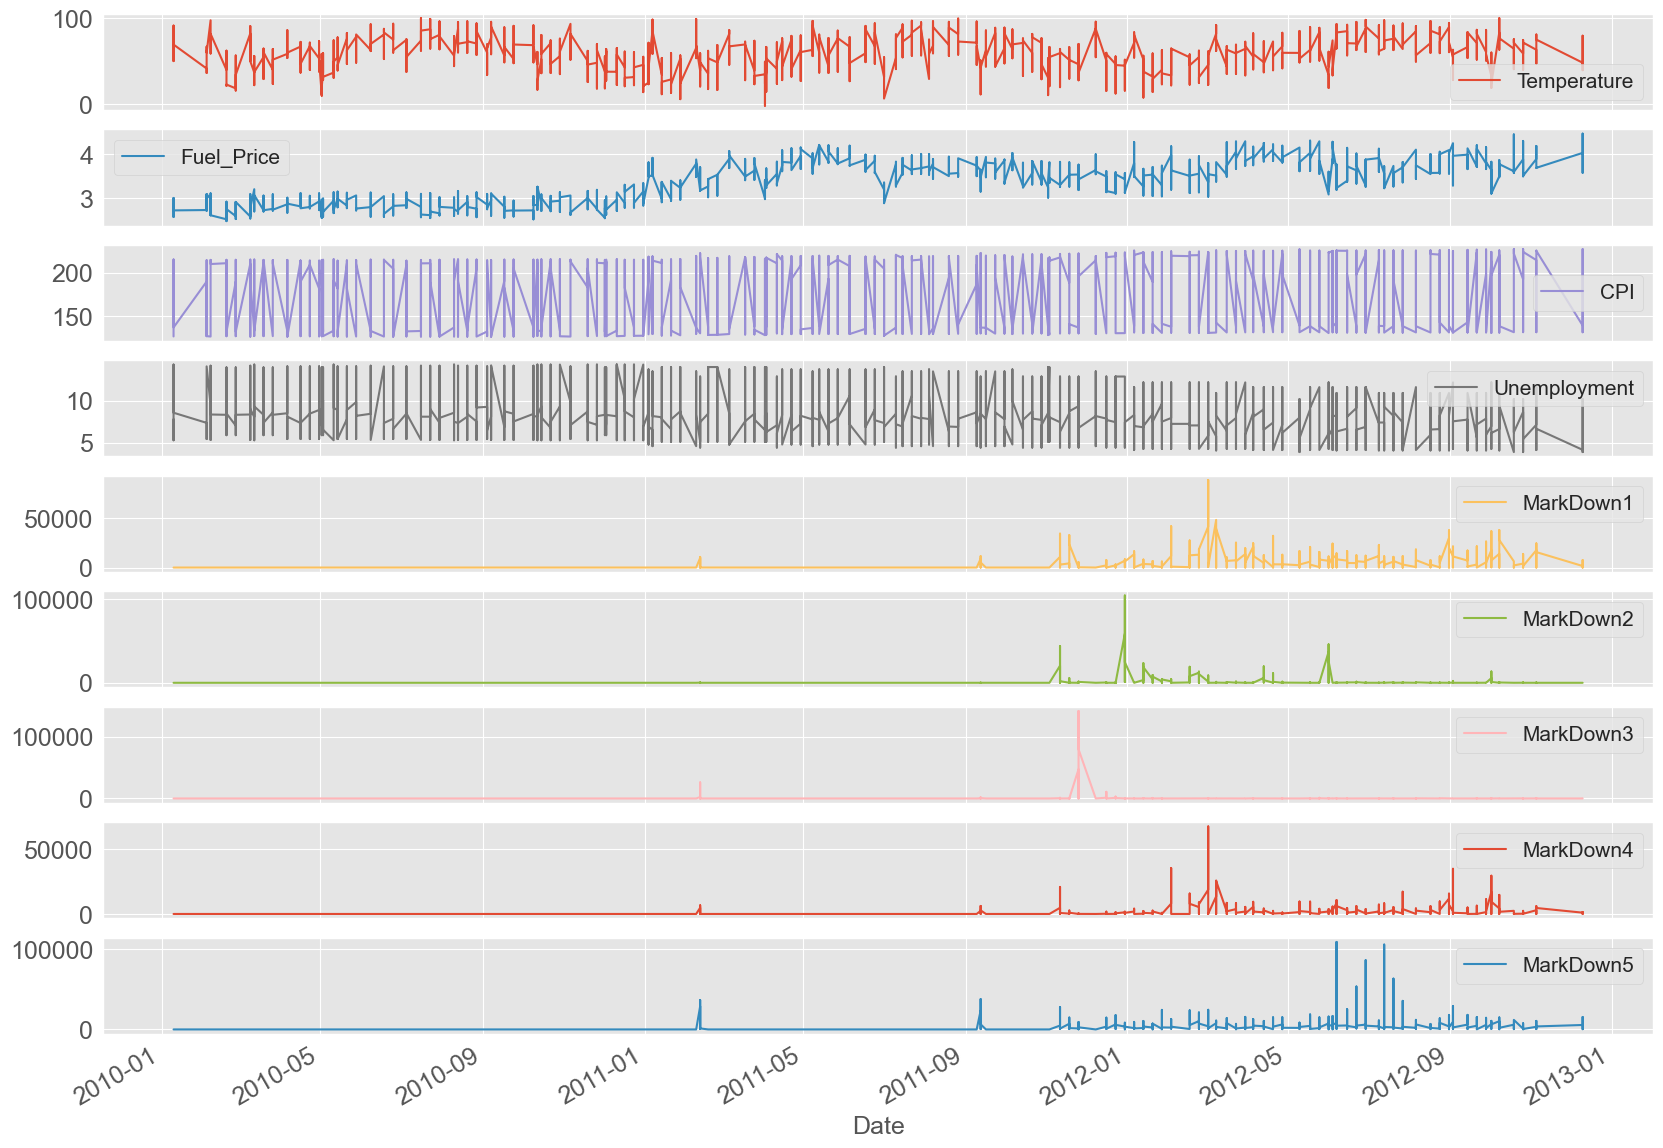

In [96]:
_ = df[['Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].plot(x = 'Date', subplots = True, figsize = (20,15))
plt.savefig(str(plot_no)+'_plot.png')
plot_no +=1

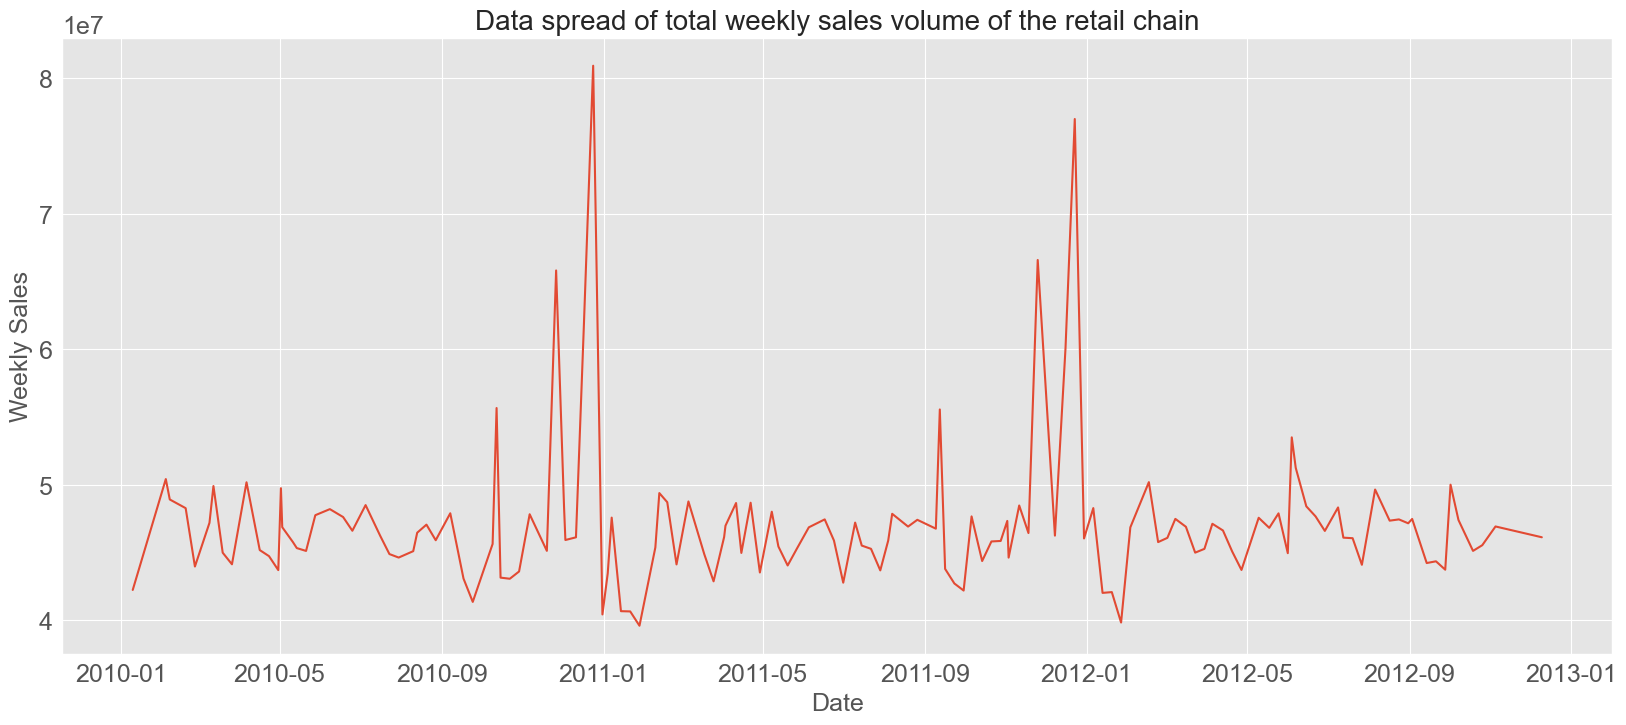

In [97]:
df_average_sales_week = df.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()
df_average_sales = df_average_sales_week.sort_values('Weekly_Sales', ascending=False)

_ = plt.figure(figsize=(20,8))
_ = plt.plot(df_average_sales_week.Date, df_average_sales_week.Weekly_Sales)
_ = plt.title('Data spread of total weekly sales volume of the retail chain')
_ = plt.xlabel('Date')
_ = plt.ylabel('Weekly Sales')
plt.savefig(str(plot_no)+'_plot.png')
plot_no +=1

# Top Stories

In [100]:
ts = df_average_sales_week.set_index('Date')
# Top performing type of stores in term of sales
df_top_stores = df.groupby(by=['Type_x'], as_index=False)['Weekly_Sales'].sum()
df_top_stores.sort_values('Weekly_Sales', ascending=False)

,Type_x,Weekly_Sales
0,A,4.331015e+09
1,B,2.000701e+09
2,C,4.055035e+08


In [101]:
# Top performing stores in term of sales
df_top_stores = df.groupby(by=['Store'], as_index=False)['Weekly_Sales'].sum()
df_top_stores.sort_values('Weekly_Sales', ascending=False)[:3]

,Store,Weekly_Sales
19,20,3.013978e+08
3,4,2.995440e+08
13,14,2.889999e+08


# Forecasting

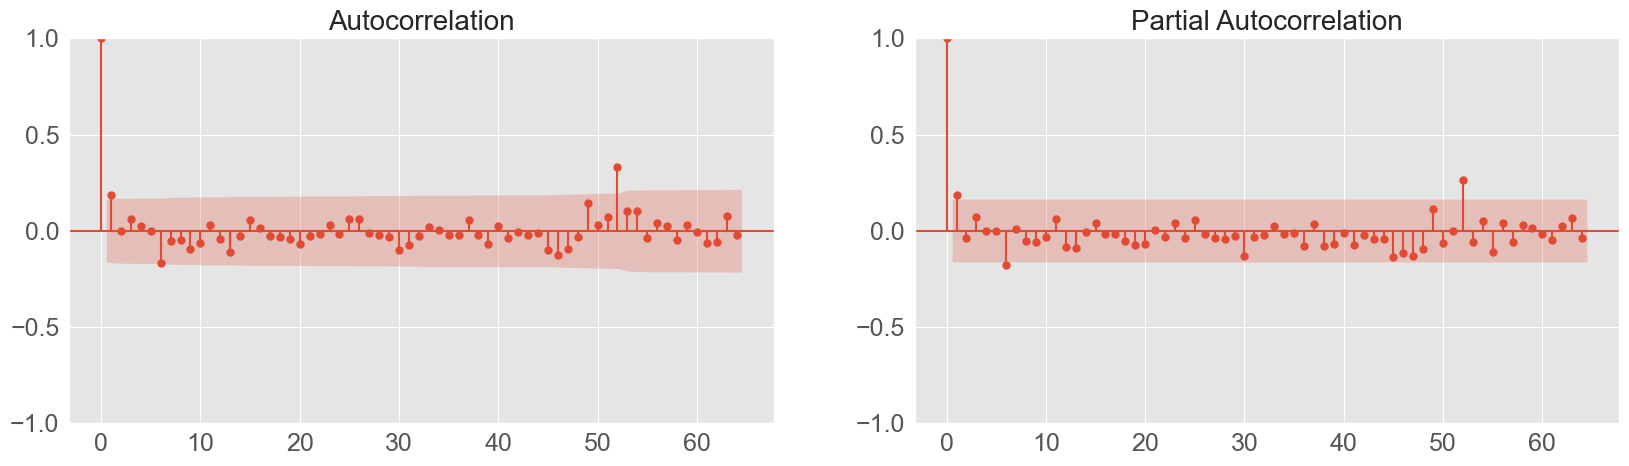

In [102]:
from statsmodels.graphics.tsaplots import acf, pacf, plot_acf, plot_pacf

fig, axes = plt.subplots(1,2, figsize=(20,5))
_ = plot_acf(ts, lags=64, ax=axes[0])
_ = plot_pacf(ts, lags=64, ax=axes[1])
plt.savefig(str(plot_no)+'_plot.png')
plot_no +=1

In [110]:
from sklearn.linear_model import LinearRegression

def fit_ar_model(ts, orders):
    X=np.array([ ts.values[(i-orders)].squeeze() if i >= np.max(orders) else np.array(len(orders) * [np.nan]) for i in range(len(ts))])
    mask = ~np.isnan(X[:,:1]).squeeze()
    Y= ts.values
    lin_reg=LinearRegression()
    lin_reg.fit(X[mask],Y[mask])
    print(lin_reg.coef_, lin_reg.intercept_)
    print('Score factor: %.2f' % lin_reg.score(X[mask],Y[mask]))
    return lin_reg.coef_, lin_reg.intercept_
    
def predict_ar_model(ts, orders, coef, intercept):
    return np.array([np.sum(np.dot(coef, ts.values[(i-orders)].squeeze())) + intercept  if i >= np.max(orders) else np.nan for i in range(len(ts))])

[-0.14758141  0.07703072 -0.10082962] 0.04523971660093502
Score factor: 0.04


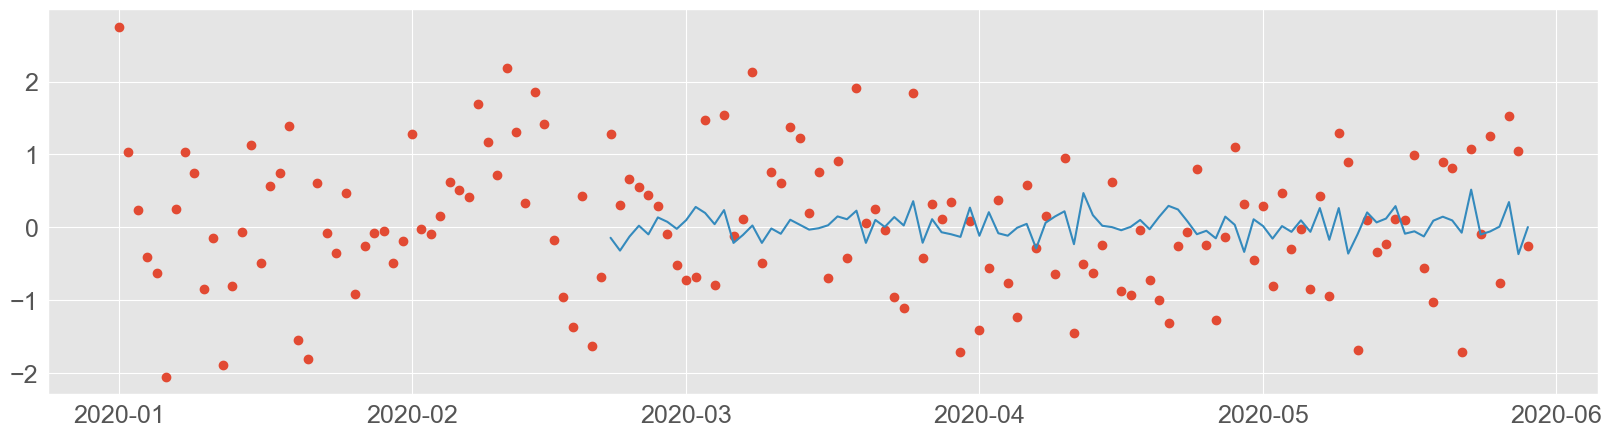

In [111]:
orders=np.array([1,6,52])
coef, intercept = fit_ar_model(ts,orders)
pred=pd.DataFrame(index=ts.index, data=predict_ar_model(ts, orders, coef, intercept))
_ = plt.figure(figsize=(20,5))
_ = plt.plot(ts, 'o')
_ = plt.plot(pred)
plt.savefig(str(plot_no)+'_plot.png')
plot_no +=1

In [112]:
ts

2020-01-01    2.751187
2020-01-02    1.027764
2020-01-03    0.230313
2020-01-04   -0.412128
2020-01-05   -0.632528
                ...   
2020-05-25    1.247364
2020-05-26   -0.766930
2020-05-27    1.523751
2020-05-28    1.049047
2020-05-29   -0.264111
Freq: D, Length: 150, dtype: float64

/var/folders/z6/8ljjr55d7sz134qq90v8c1xh0000gp/T/ipykernel_6707/2002814819.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



AR Residuals: avg 0.98, std 0.17


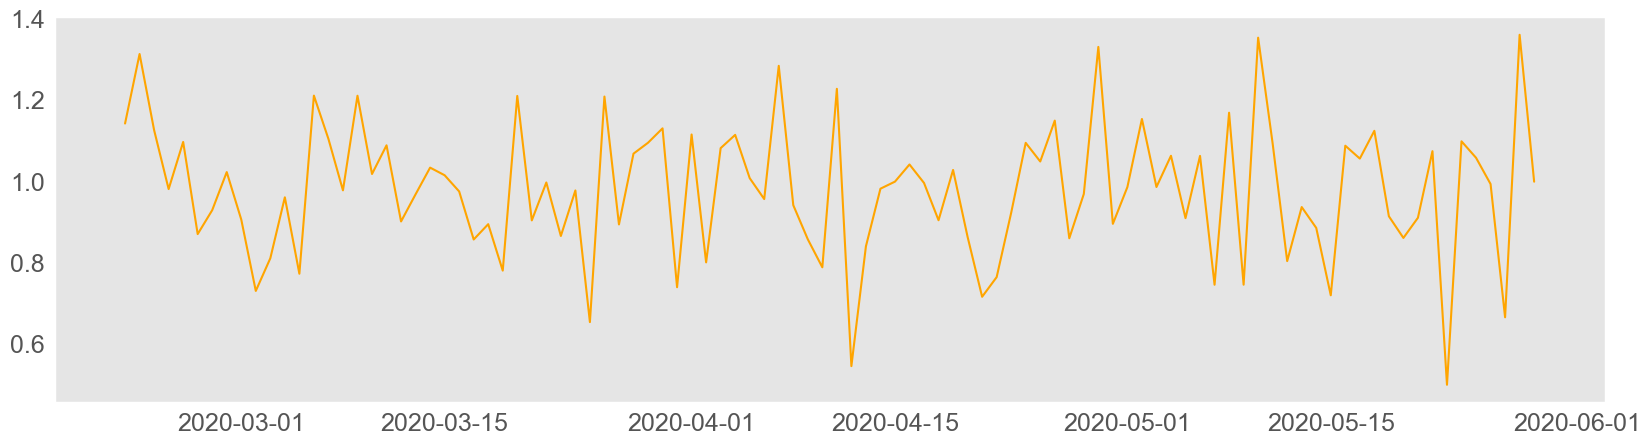

In [114]:
diff=(ts[1]-pred[0])/ts[1]

print('AR Residuals: avg %.2f, std %.2f' % (diff.mean(), diff.std()))
 
_ = plt.figure(figsize=(20,5))
_ = plt.plot(diff, c='orange')
_ = plt.grid()
plt.savefig(str(plot_no)+'_plot.png')
plot_no +=1

In [115]:
df20=df.where( df['Store'] == 20)
df20=df20.dropna()
df20=df20.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()
df20 = df20.set_index('Date')
df20.head()

,Weekly_Sales
Date,
2010-01-10,1933719.21
2010-02-04,2405395.22
2010-02-07,2143676.77
2010-02-19,2161549.76
2010-02-26,1898193.95


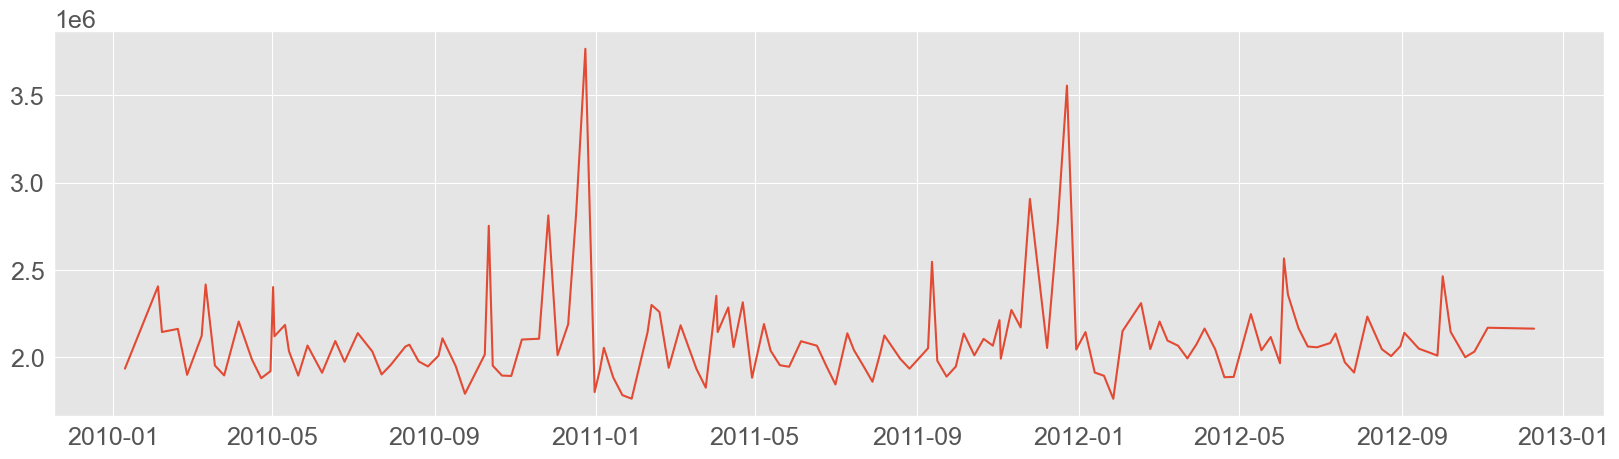

In [116]:
_ = plt.figure(figsize=(20,5))
_ = plt.plot(df20.index, df20.values)
plt.savefig(str(plot_no)+'_plot.png')
plot_no +=1

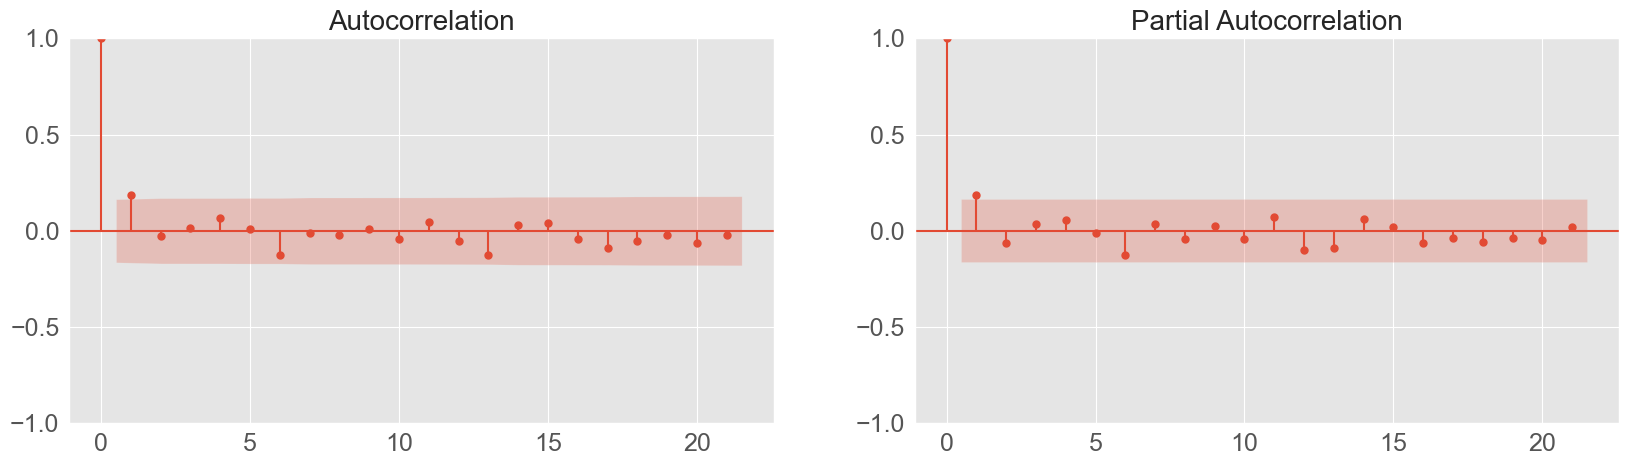

In [117]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
_ = plot_acf(df20.values, lags=21, alpha=0.05, ax=axes[0])
_ = plot_pacf(df20.values, lags=21, alpha=0.05, ax=axes[1])
plt.savefig(str(plot_no)+'_plot.png')
plot_no +=1

In [120]:
dfext=df.where( df['Store'] == 20)
dfext=dfext.dropna()
dfext=dfext.groupby(by=['Date'], as_index=False)[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 
                                                  'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].mean()
dfext = dfext.set_index('Date')
dfext.head()

,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
Date,,,,,,,,,
2010-01-10,61.08,2.707,204.885097,7.484,0.0,0.0,0.0,0.0,0.0
2010-02-04,51.00,2.850,204.025284,7.856,0.0,0.0,0.0,0.0,0.0
2010-02-07,70.10,2.815,204.465056,7.527,0.0,0.0,0.0,0.0,0.0
2010-02-19,25.43,2.745,204.432100,8.187,0.0,0.0,0.0,0.0,0.0
2010-02-26,32.32,2.754,204.463087,8.187,0.0,0.0,0.0,0.0,0.0


In [121]:
dfext['shifted_sales'] = df20.shift(-1)
dfext.head()

,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,shifted_sales
Date,,,,,,,,,,
2010-01-10,61.08,2.707,204.885097,7.484,0.0,0.0,0.0,0.0,0.0,2405395.22
2010-02-04,51.00,2.850,204.025284,7.856,0.0,0.0,0.0,0.0,0.0,2143676.77
2010-02-07,70.10,2.815,204.465056,7.527,0.0,0.0,0.0,0.0,0.0,2161549.76
2010-02-19,25.43,2.745,204.432100,8.187,0.0,0.0,0.0,0.0,0.0,1898193.95
2010-02-26,32.32,2.754,204.463087,8.187,0.0,0.0,0.0,0.0,0.0,2121561.41


<Axes: >

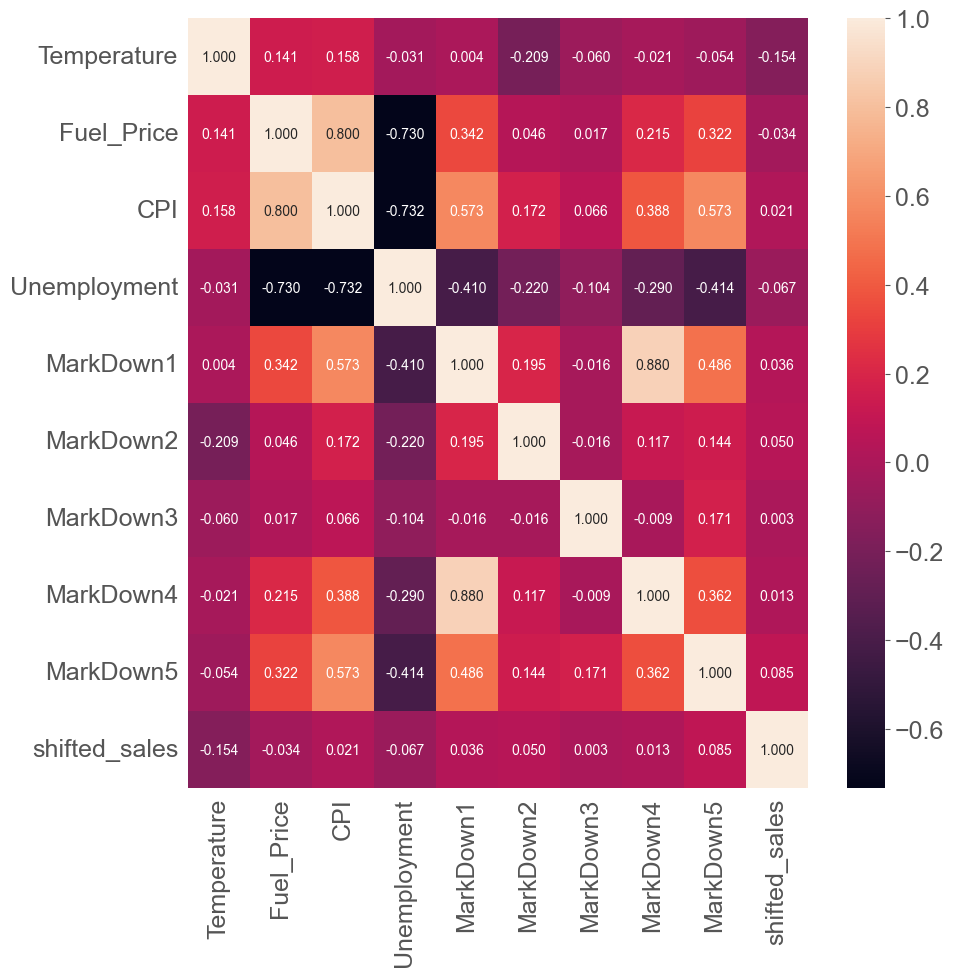

In [122]:
corr = dfext.corr()
_ = plt.figure(figsize=(10,10))
sns.heatmap(corr, 
            annot=True, fmt=".3f",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values);
plt.savefig(str(plot_no)+'_plot.png')
plot_no +=1

In [123]:
corr['shifted_sales'].sort_values(ascending=False)

shifted_sales    1.000000
MarkDown5        0.084797
MarkDown2        0.050189
MarkDown1        0.035654
CPI              0.021002
MarkDown4        0.013042
MarkDown3        0.002624
Fuel_Price      -0.033798
Unemployment    -0.067482
Temperature     -0.154182
Name: shifted_sales, dtype: float64

In [124]:
def fit_ar_model_ext(ts, orders, ext, fitter=LinearRegression()):
    X=np.array([ ts.values[(i-orders)].squeeze() if i >= np.max(orders) else np.array(len(orders) * [np.nan]) for i in range(len(ts))])
    X = np.append(X, ext.values, axis=1)
    mask = ~np.isnan(X[:,:1]).squeeze()
    Y= ts.values
    fitter.fit(X[mask],Y[mask].ravel())
    print(fitter.coef_, fitter.intercept_)
    print('Score factor: %.2f' % fitter.score(X[mask],Y[mask]))
    return fitter.coef_, fitter.intercept_
    
def predict_ar_model_ext(ts, orders, ext, coef, intercept):
    X=np.array([ ts.values[(i-orders)].squeeze() if i >= np.max(orders) else np.array(len(orders) * [np.nan]) for i in range(len(ts))])
    X = np.append(X, ext.values, axis=1)
    return np.array( np.dot(X, coef.T) + intercept)

[ 1.72193363e-01 -1.00712307e-01  5.02007961e-02 -5.40426670e-02
  4.34603507e-01 -2.68876289e+05 -1.90225365e+05  1.39737992e+04
 -2.11041497e+03 -2.14311958e+00 -4.31045916e+00  7.04969510e+00
  4.85327292e+00 -3.12871978e+00] 875518.0700809357
Score factor: 0.58


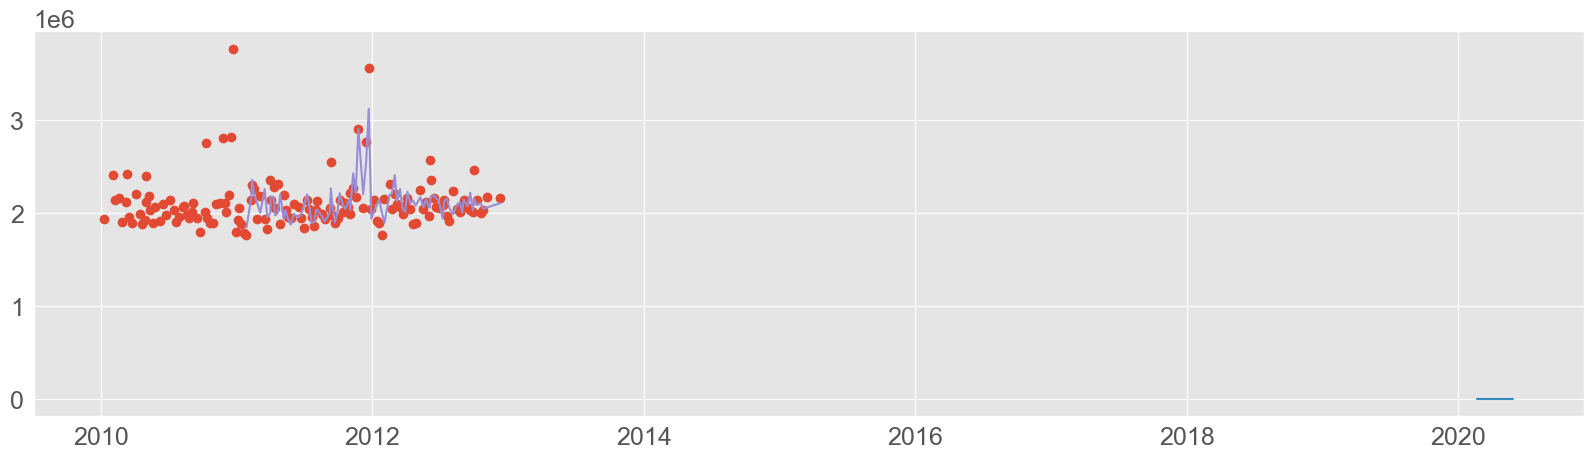

In [125]:
#dfexte=dfext.drop(['shifted_sales'], axis=1)
dfexte=dfext[['Unemployment','Fuel_Price','CPI','Temperature',
              'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']]

orders=np.array([1,6,29,46,52])
coef, intercept = fit_ar_model_ext(df20,orders,dfexte)
pred_ext=pd.DataFrame(index=df20.index, data=predict_ar_model_ext(df20, orders, dfexte, coef, intercept))
_ = plt.figure(figsize=(20,5))
_ = plt.plot(df20, 'o')
_ = plt.plot(pred)
_ = plt.plot(pred_ext)
plt.savefig(str(plot_no)+'_plot.png')
plot_no +=1

AR Residuals: avg nan, std nan
AR wiht Ext Residuals: avg -0.00, std 0.07


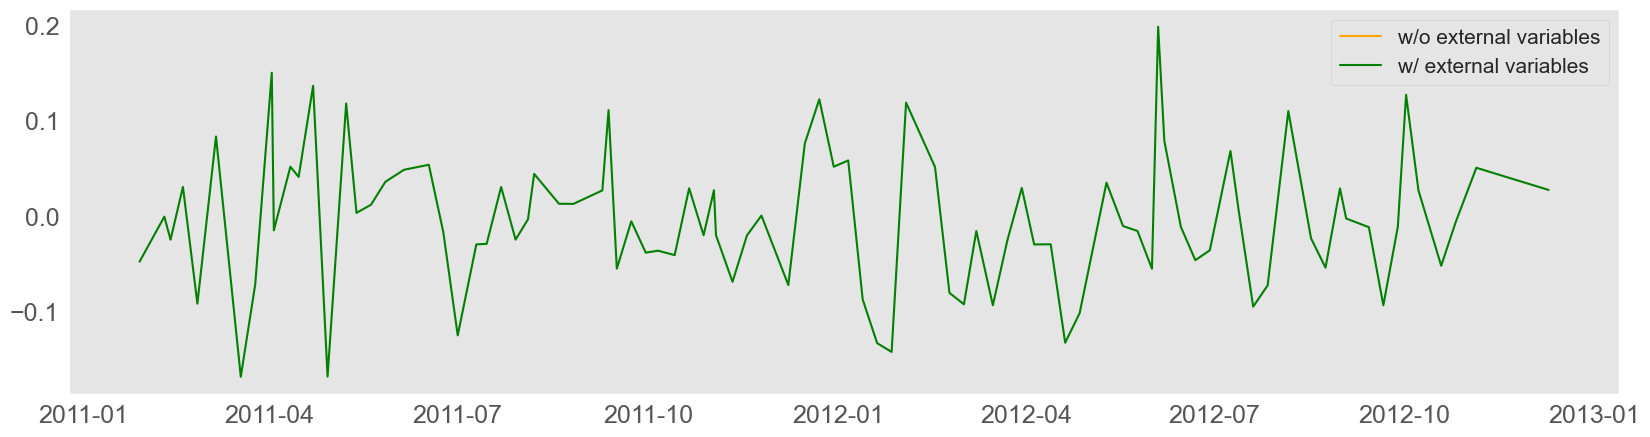

In [126]:
diff=(df20['Weekly_Sales']-pred[0])/df20['Weekly_Sales']
diff_ext=(df20['Weekly_Sales']-pred_ext[0])/df20['Weekly_Sales']

print('AR Residuals: avg %.2f, std %.2f' % (diff.mean(), diff.std()))
print('AR wiht Ext Residuals: avg %.2f, std %.2f' % (diff_ext.mean(), diff_ext.std()))
 
_ = plt.figure(figsize=(20,5))
_ = plt.plot(diff, c='orange', label='w/o external variables')
_ = plt.plot(diff_ext, c='green', label='w/ external variables')
_ = plt.legend()
_ = plt.grid()
plt.savefig(str(plot_no)+'_plot.png')
plot_no +=1